In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
plt.rcParams.update({'font.size': 16, 'figure.figsize':(8,6)})

## Plotting functions

In [3]:
def plot_error(statistic, errtag):
    
    res_dir = '../../clust/results_{}/'.format(statistic)
    GP_error = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))

    rads = np.linspace(2, 24, 12)
    plt.plot(rads, GP_error)
    plt.figure()
    plt.semilogy(rads, GP_error)

In [144]:
def plot_training(statistic, traintag, errtag='', subsample=None, version=None, nbins=9):
    plt.figure(figsize=(10,8)) 
    ps = []

    CC = range(0, 40)
    #CC = range(0,1)
    #HH = np.loadtxt("../CMASS/Gaussian_Process/GP/HOD_random_subsample_{}_version_{}.dat".format(subsample, version))
    #HH = np.atleast_2d(HH[0][:3])
    nhodnonolap = 100
    nhodpercosmo = 50
    #nhodpercosmo = 1
    HH = np.array(range(0,len(CC)*nhodnonolap))
    HH  = HH.reshape(len(CC), nhodnonolap)
    HH = HH[:,0:nhodpercosmo]
    
    res_dir = '../../clust/results_{}/'.format(statistic)
    if errtag:
        GP_error = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
    
    #color_idx = np.linspace(0, 1, np.max(HH)+1)
    color_idx = np.linspace(0, 1, len(CC))

    for cosmo in CC:
        HH_set = HH[cosmo]
        for hod in HH_set:
            zz = np.random.randint(len(HH.flatten()))
            hod = int(hod)
            color=plt.cm.rainbow(color_idx[cosmo])
            fn = '{}training_{}{}/{}_cosmo_{}_HOD_{}_test_0.dat'.format(res_dir, statistic, traintag, statistic, cosmo, hod)
            r, p = np.loadtxt(fn, delimiter=',',unpack=True)
            #plt.semilogy(n, p, marker='o')
            #plt.errorbar(n, p, yerr=pstd, fmt='o')
            if errtag:
                plt.errorbar(r[:nbins], p[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1, color=color, 
                             zorder=zz)
            else:
                plt.plot(r[:nbins], p[:nbins], color=color, lw=0.5, zorder=zz)
                
    plt.yscale("log")
    plt.xlabel("r (Mpc/h)") #is it? are positions in Mpc? not h?
    plt.ylabel(r"P$_U$(r)")

In [5]:
def plot_testing(statistic, testtag, errtag='', nbins=9):
    plt.figure(figsize=(10,8)) 
    ax = plt.gca()

    CC_test = range(0, 7)
    #HH_test = range(0, 10)
    HH_test = [0, 6, 10, 11, 14, 16, 19, 20, 23, 24]#, 25, 26, 27, 28, 29, 32, 33, 38, 41, 43, 44, 47, 
               #50, 52, 57, 58, 59, 60, 64, 68, 71, 72, 74, 75, 77, 81, 82, 83, 84, 85, 87, 91, 97, 99] #good hods  

    res_dir = '../../clust/results_{}/'.format(statistic)
    if errtag:
        GP_error = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
    color_idx = np.linspace(0, 1, len(HH_test))
    boxes = range(5)
    
    for cosmo in CC_test:
        hodcount = 0
        for hod in HH_test:
            for box in boxes:
                hod = int(hod)
                colidx = hodcount
                color=plt.cm.rainbow(color_idx[colidx])

                idtag = '{}_cosmo_{}_Box_{}_HOD_{}_test_0.dat'.format(statistic, cosmo, box, hod)
                fnt = '{}testing_{}{}/{}'.format(res_dir, statistic, testtag, idtag)
                #fnt = '../testing_results/tests_{}{}/{}.dat'.format(statistic, acctag, idtag)

                ntest, ptest = np.loadtxt(fnt, delimiter=',', unpack=True)
                if errtag:
                    plt.errorbar(ntest[:nbins], ptest[:nbins], yerr=GP_error[:nbins], lw=0.5, elinewidth=1, capsize=1, color=color)
                else:
                    plt.plot(ntest[:nbins], ptest[:nbins], color=color, lw=0.5)
            hodcount += 1
                   
    plt.yscale("log")
    plt.xlabel("r (Mpc/h)") #is it? are positions in Mpc? not h?
    plt.ylabel(r"P(r)")
    ax.legend()

In [143]:
def plot_accuracy(statistic, acctag, hod=None, subsample=None, version=None, errtag=None, nbins=9, remove=None,
                 plot_wrt_mean=True):
    
    if plot_wrt_mean:
        ncols = 4
    else:
        ncols = 3
    fig, ax = plt.subplots(ncols, 1, figsize=(10,15), gridspec_kw={'height_ratios': [1]*ncols})

    CC_test = range(0, 7)
    HH_test = range(0, 10)
    if remove:
        for rval in remove:
            HH_test.remove(rval)
    #HH_test = np.array([0,1,2,3,4,6,7,8,9])
    #HH_test = [0, 6, 10, 11, 14, 16, 19, 20, 23, 24]#, 25, 26, 27, 28, 29, 32, 33, 38, 41, 43, 44, 47, 
               #50, 52, 57, 58, 59, 60, 64, 68, 71, 72, 74, 75, 77, 81, 82, 83, 84, 85, 87, 91, 97, 99] #good hods  
    upf_mean = np.zeros(nbins)
    
    res_dir = '../../clust/results_{}/'.format(statistic)
    if errtag:
        GP_error = np.loadtxt(res_dir+"{}_error{}.dat".format(statistic, errtag))
    
    for cosmo in CC_test:
        for hod in HH_test:
            hod = int(hod)
            if "mean" in acctag:
                idtag = '{}_cosmo_{}_HOD_{}_mean'.format(statistic, cosmo, hod)
            else:
                idtag = '{}_cosmo_{}_Box_0_HOD_{}_test_0'.format(statistic, cosmo, hod)
            fnt = '../testing_results/tests_{}{}/{}.dat'.format(statistic, acctag, idtag)
            ntest, ptest = np.loadtxt(fnt)
            upf_mean += ptest[:nbins]

    upf_mean /= len(CC_test)*len(HH_test)
    print "mean:",upf_mean    
    #color_idx = np.linspace(0, 1, len(CC_test)*len(HH_test))
    color_idx = np.linspace(0, 1, len(HH_test))

    i = 0
    fracerrs = []
    
    for cosmo in CC_test:
        colidx = 0
        for hod in HH_test:
            hod = int(hod)
            color=plt.cm.rainbow(color_idx[colidx])
            colidx += 1
            if "mean" in acctag:
                idtag = '{}_cosmo_{}_HOD_{}_mean'.format(statistic, cosmo, hod)
            else:
                idtag = '{}_cosmo_{}_Box_0_HOD_{}_test_0'.format(statistic, cosmo, hod)
            fnt = '../testing_results/tests_{}{}/{}.dat'.format(statistic, acctag, idtag)
            
            ntest, ptest = np.loadtxt(fnt)
            if i==0:
                ax[0].semilogy(ntest[:nbins], ptest[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color, label='testbox (actual)')
            else:
                ax[0].semilogy(ntest[:nbins], ptest[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color)

            
            fnp = '../testing_results/predictions_{}{}/{}.dat'.format(statistic, acctag, idtag)
            npredic, ppredic = np.loadtxt(fnp)
            if i==0:
                ax[0].semilogy(npredic[:nbins], ppredic[:nbins], marker=None, ls='-', color=color, label='emulator prediction')
            else: 
                ax[0].semilogy(npredic[:nbins], ppredic[:nbins], marker=None, ls='-', color=color)
            ax[0].set_ylabel(r"P$_U$(r)")
            
            idx_err = 1
            if plot_wrt_mean:
                ax[1].plot(ntest[:nbins], ptest[:nbins]/upf_mean[:nbins], marker='o', ls='None', markerfacecolor='None', markeredgecolor=color)
                ax[1].plot(npredic[:nbins], ppredic[:nbins]/upf_mean[:nbins], marker=None, ls='-', color=color)
                ax[1].set_ylabel(r"P$_v$/P$_{v,mean}$")
                idx_err = 2

            fracerr = (ppredic-ptest)/ptest
            fracerrs.append(fracerr)
            ax[idx_err].plot(ntest[:nbins], fracerr[:nbins], color=color)
            ax[idx_err].set_ylabel(r"(P$_{emulator}$-P$_{true}$)/P$_{true}$")
            #ax1.plot(ntest, ppredic/ptest)
            i += 1


    frac_rms = np.loadtxt("../testing_results/{}_testing_results{}.dat".format(statistic, acctag))
    
    #std = np.std(frac_rms, axis=0)
    #var = np.var(frac_rms, axis=0)
    fracerrs = np.array(fracerrs)
    print len(fracerrs)
    print max(fracerrs[:,-1])
    print np.argmax(fracerrs[:,-1])
    std = np.std(fracerrs, axis=0)
    ax[idx_err+1].semilogy(ntest[:nbins], std[:nbins], color='g', label='prediction error')
    if errtag:
        ax[idx_err+1].semilogy(ntest[:nbins], GP_error[:nbins], color='r', label='training set error')
    ax[idx_err+1].set_ylabel("fractional error")
    ax[idx_err+1].legend()
                           
    plt.xlabel("r (Mpc/h)") #is it? are positions in Mpc? not h?
    ax[0].legend()


/Users/Kate/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


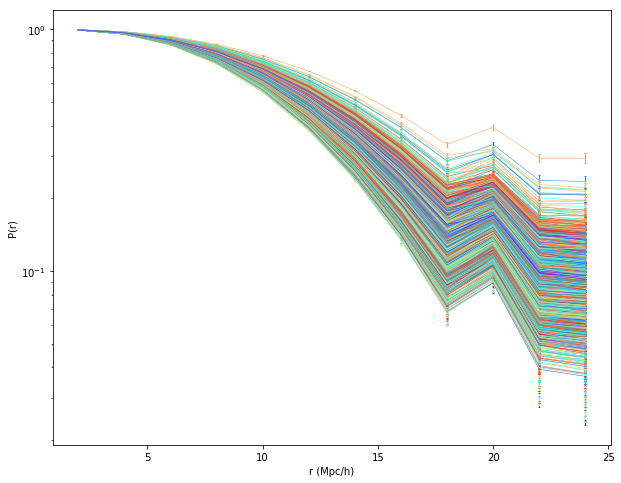

In [6]:
statistic='upf'
traintag = '_sample50v4'
plot_training(statistic, traintag, errtag='_10goodhod', subsample=50, version=4)

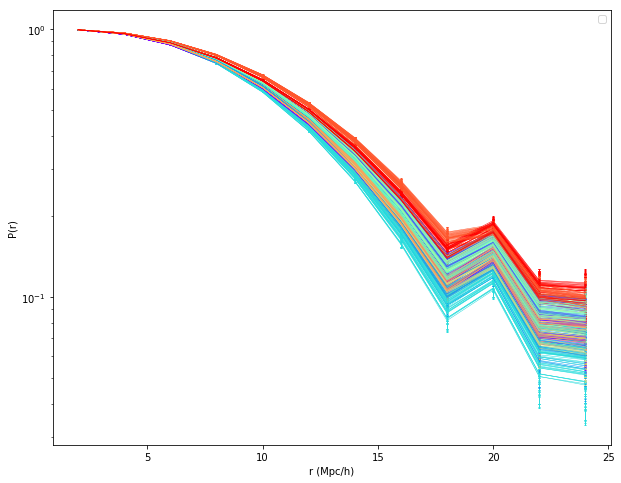

In [7]:
statistic='upf'
testtag = '_10goodhod'
plot_testing(statistic, testtag, errtag='_10goodhod')

mean: [0.99465431 0.96185086 0.88698997 0.77013283 0.62427341 0.46977861
 0.3267357  0.20925701 0.12290614 0.15123709 0.08294083 0.07935931]


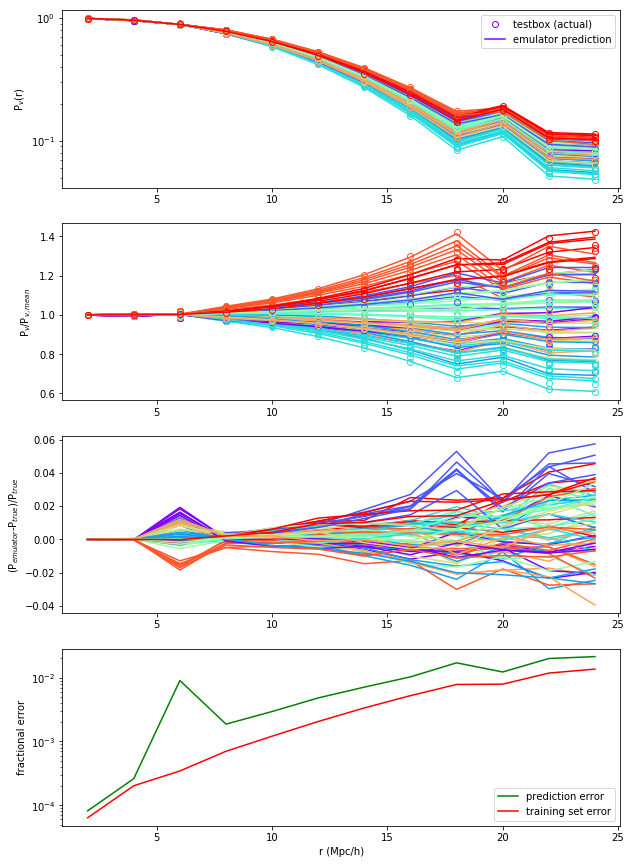

In [8]:
statistic='upf'
traintag = '_sample50v4'
testtag = '_10goodhod'
errtag = '_10goodhod'
tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag
plot_accuracy(statistic, acctag, errtag=errtag)

/Users/Kate/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning: object of type <type 'numpy.float64'> cannot be safely interpreted as an integer.
  from ipykernel import kernelapp as app


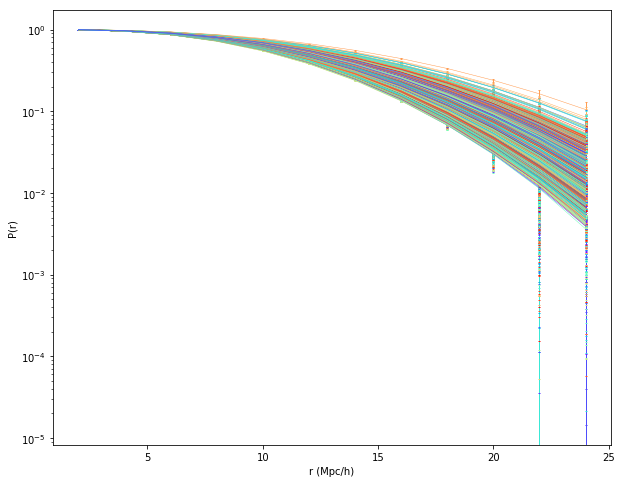

In [9]:
statistic='vpf'
traintag = '_sample50v4'
plot_training(statistic, traintag, errtag='_10goodhod', subsample=50, version=4)

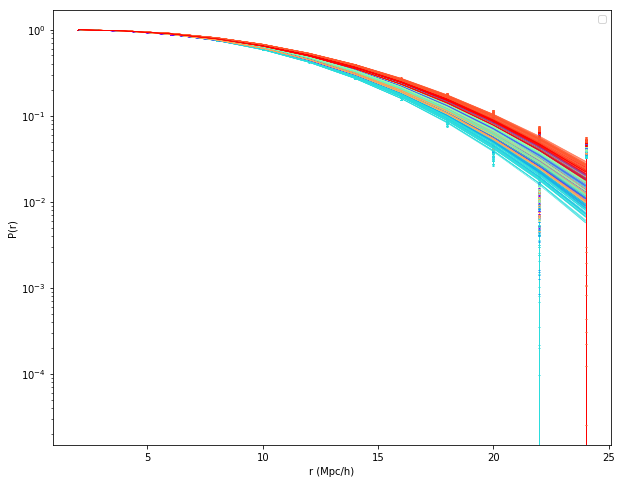

In [10]:
statistic='vpf'
testtag = '_10goodhod'
plot_testing(statistic, testtag, errtag='_10goodhod')

mean: [0.99468277 0.9618671  0.88702057 0.77018017 0.62421084 0.46983734
 0.32679736 0.20927424 0.12285606 0.0660102  0.032379   0.01441399]


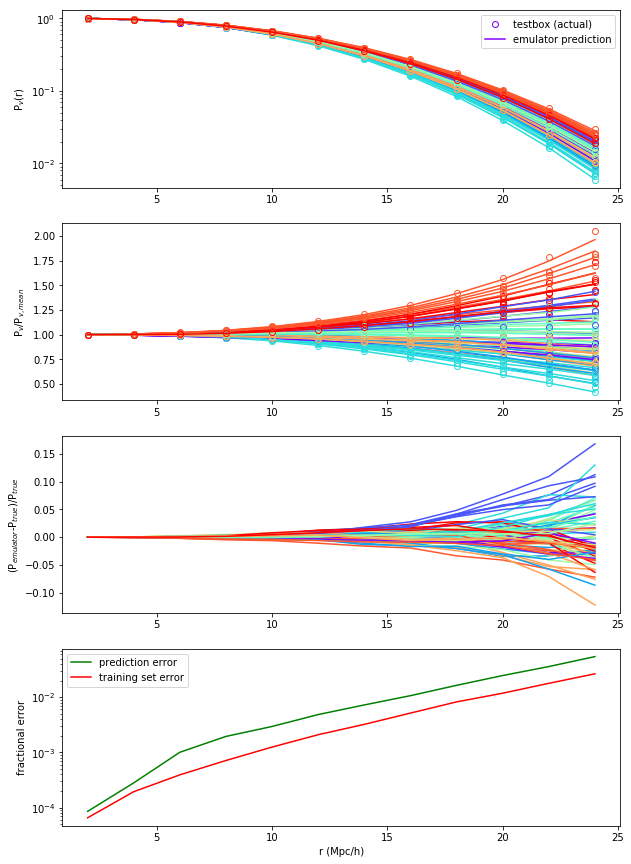

In [11]:
statistic='vpf'
traintag = '_sample50v4'
testtag = '_10goodhod'
errtag = '_10goodhod'
tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag
plot_accuracy(statistic, acctag, errtag=errtag)

[[5.00000e+00 9.34576e-01]
 [1.00000e+01 6.55175e-01]
 [1.50000e+01 3.08231e-01]
 [2.00000e+01 1.88549e-01]
 [2.50000e+01 7.97370e-02]
 [3.00000e+01 3.50900e-02]
 [3.50000e+01 1.43810e-02]
 [4.00000e+01 3.32100e-03]
 [4.50000e+01 8.16000e-04]]
[ 5. 10. 15. 20. 25. 30. 35. 40. 45.]
[9.34576e-01 6.55175e-01 3.08231e-01 1.88549e-01 7.97370e-02 3.50900e-02
 1.43810e-02 3.32100e-03 8.16000e-04]


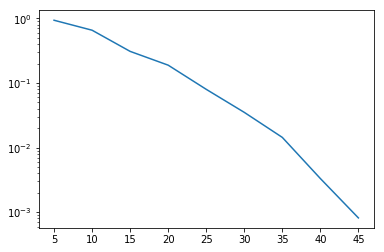

In [12]:
test99 = np.array([[5.000000,0.934576],
[10.000000,0.655175],
[15.000000,0.308231],
[20.000000,0.188549],
[25.000000,0.079737],
[30.000000,0.035090],
[35.000000,0.014381],
[40.000000,0.003321],
[45.000000,0.000816]])
print test99
r99 = test99[:,0]
p99 = test99[:,1]
print r99
print p99
plt.semilogy(r99, p99)

# New Mocks

### VPF Training

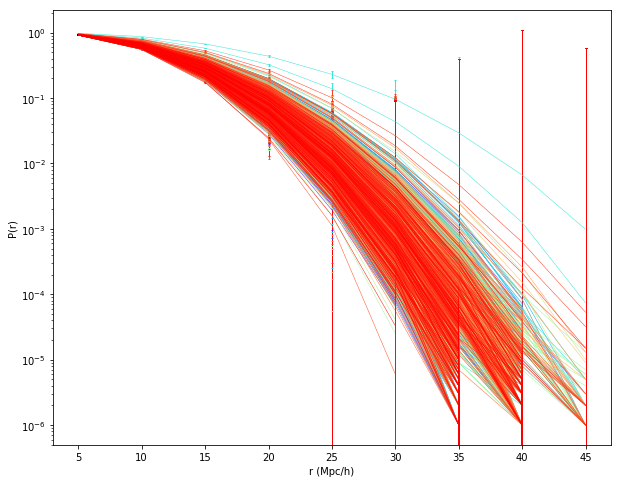

In [13]:
statistic='vpf'
traintag = '_nonolap'
plot_training(statistic, traintag, errtag='_10hod_test0')

### VPF Test accuracy

mean: [0.93319993 0.64338621 0.29087694 0.0813639  0.01356569]


/Users/Kate/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in divide


70
inf
0


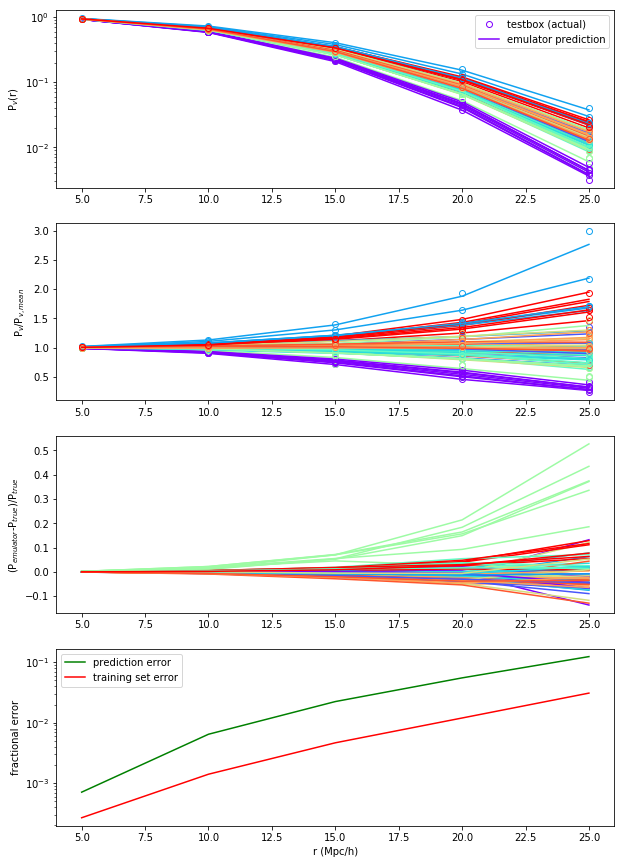

In [64]:
statistic='vpf'
traintag = '_nonolap'
testtag = ''
errtag = '_10hod_test0'
tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag
plot_accuracy(statistic, acctag, errtag=errtag, nbins=5)

### VPF Test accuracy, remove outlying HOD

mean: [0.93332087 0.64606975 0.29536473 0.08394578 0.01426194]


/Users/Kate/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:69: RuntimeWarning: divide by zero encountered in divide


63
inf
0


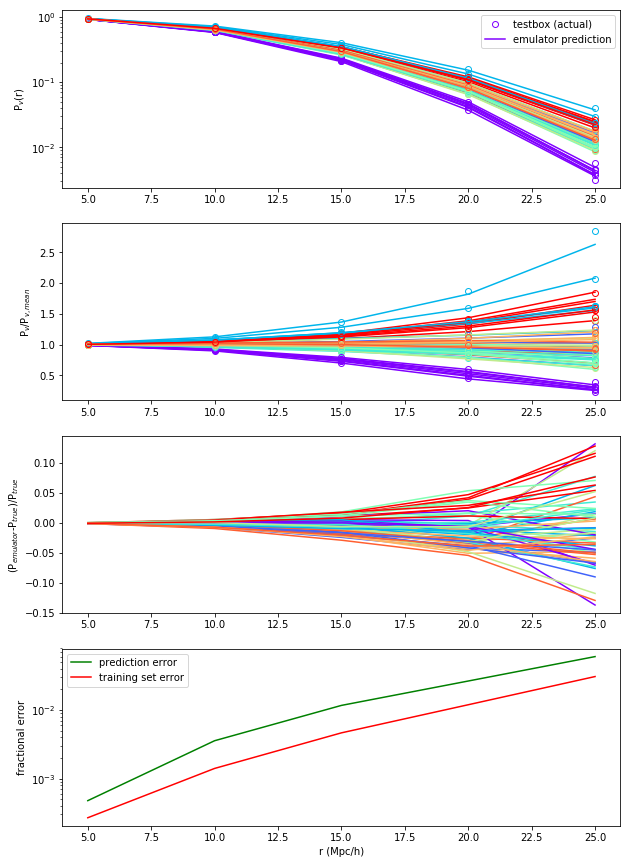

In [66]:
statistic='vpf'
traintag = '_nonolap'
testtag = ''
errtag = '_10hod_test0'
tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag
plot_accuracy(statistic, acctag, errtag=errtag, nbins=5, remove=[5])

### UPF training

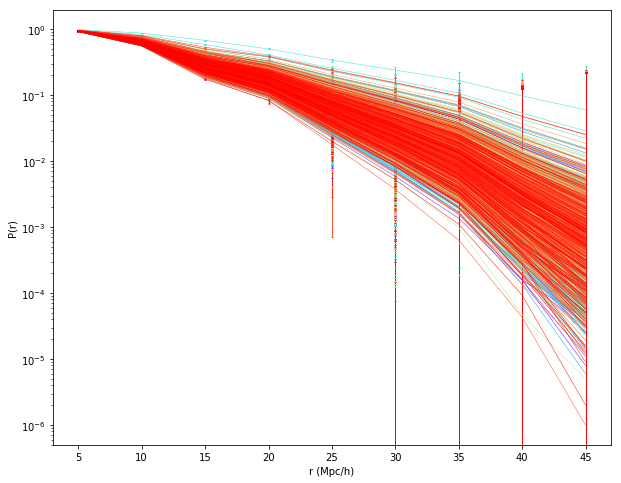

In [15]:
statistic='upf'
traintag = '_nonolap'
plot_training(statistic, traintag, errtag='_10hod_test0')

### UPF Test accuracy

mean: [0.93319416 0.64344216 0.29092571 0.17670473 0.07286836 0.03268373
 0.01388316 0.00367529 0.00115289]
5
3
70
2.9363436731375607
35


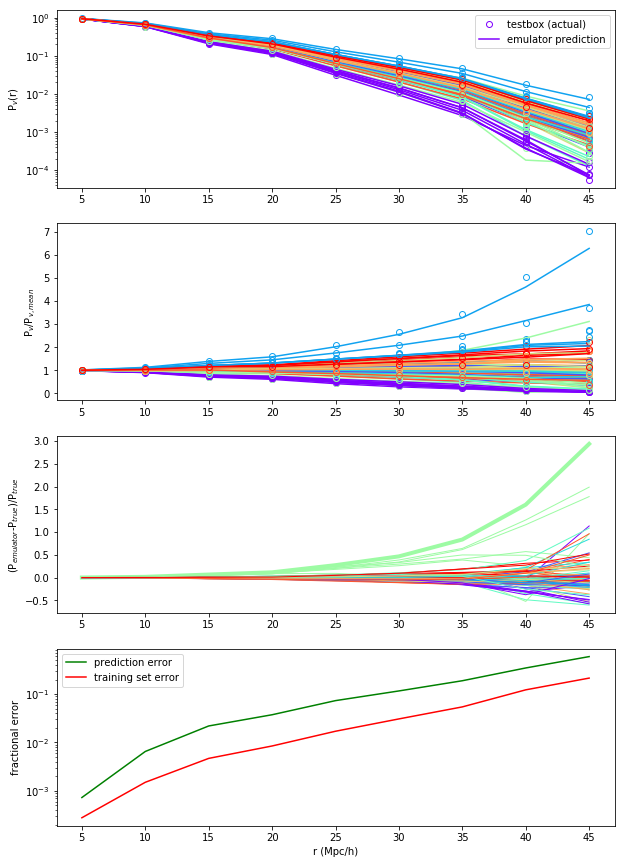

In [37]:
statistic='upf'
traintag = '_nonolap'
testtag = ''
errtag = '_10hod_test0'
tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag
plot_accuracy(statistic, acctag, errtag=errtag, nbins=9)

### UPF Test accuracy, remove outlying HOD

mean: [0.93330179 0.64610708 0.29539937 0.18030859 0.07519084]
63
1.133996542194897
0


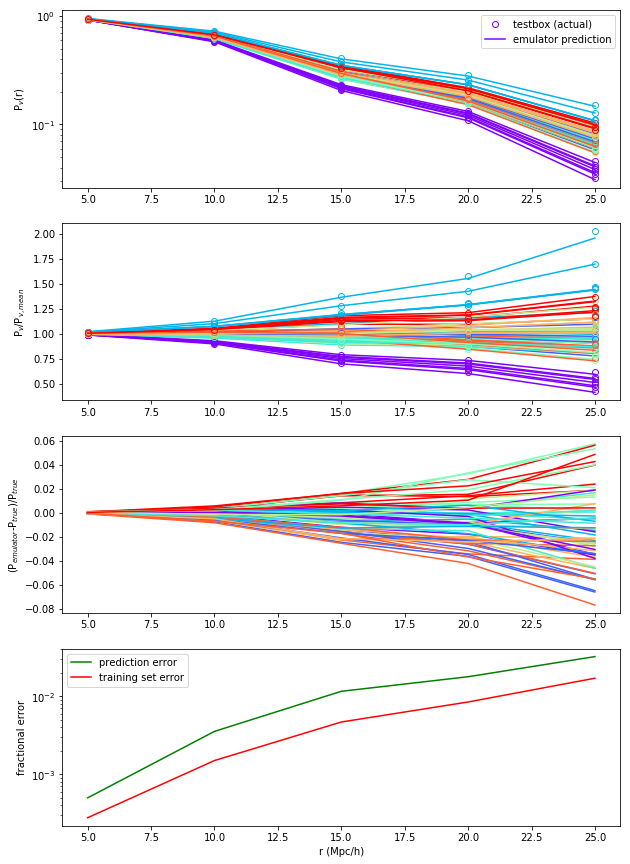

In [93]:
statistic='upf'
traintag = '_nonolap'
testtag = ''
errtag = '_10hod_test0'
tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag
plot_accuracy(statistic, acctag, errtag=errtag, nbins=5, remove=[5])

In [88]:
hods_test = np.loadtxt('../tables/HOD_test_np11_n1000_new_f_env.dat')
hods_test = hods_test[:10]

In [89]:
hods_train = np.loadtxt('../tables/HOD_design_np11_n5000_new_f_env.dat')
nhodnonolap = 100
nhodpercosmo = 50
ncosmos = 40
HH = np.array(range(0,ncosmos*nhodnonolap))
HH  = HH.reshape(ncosmos, nhodnonolap)
HH = HH[:,0:nhodpercosmo]
hods_train = hods_train[HH.flatten()]

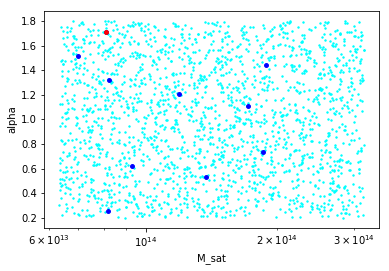

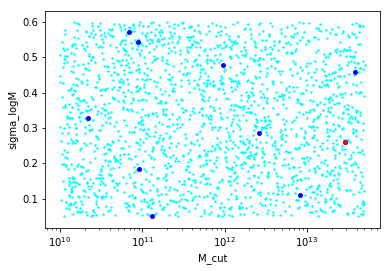

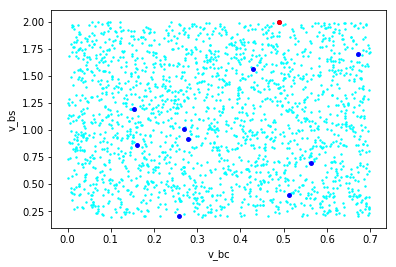

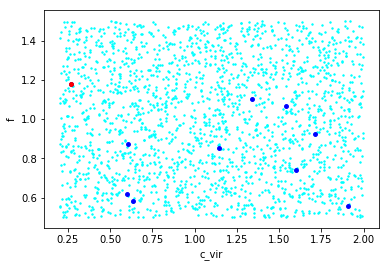

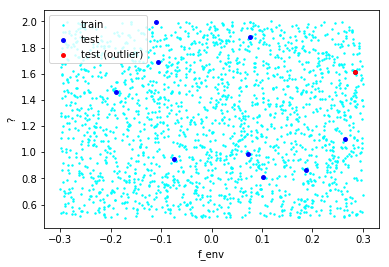

In [91]:
bad = 5

cols = ['M_sat', 'alpha', 'M_cut', 'sigma_logM', 'v_bc', 'v_bs', 'c_vir', 'f', 'f_env', '?', '?']


pairs = [(0, 1),(2,3),(4,5),(6,7),(8,9)]
for pair in pairs:
    plt.figure()
    x = pair[0]
    y = pair[1]
    plt.scatter(hods_train[:,x], hods_train[:,y], color='cyan', label='train', s=2)
    plt.scatter(hods_test[:,x], hods_test[:,y], color='blue', label='test', s=15)
    plt.scatter(hods_test[bad,x], hods_test[bad,y], color='red', label='test (outlier)', s=15)
    if cols[x]=='M_sat' or cols[x]=='M_cut':
        plt.xscale('log')
    if cols[y]=='M_sat' or cols[y]=='M_cut':
        plt.yscale('log')
    plt.xlabel(cols[x])
    plt.ylabel(cols[y])
plt.legend()

In [119]:
plt.rcParams['xtick.labelsize']=16
plt.rcParams['ytick.labelsize']=16
plt.rcParams['axes.labelsize']=20
plt.rcParams['legend.fontsize']=16
# for key in plt.rcParams.keys():
#     if 'legend' in key:
#         print key

mean: [0.93321137 0.64546858 0.29426163 0.17928032 0.07443664 0.03360378]
63
2.535982642590382
0


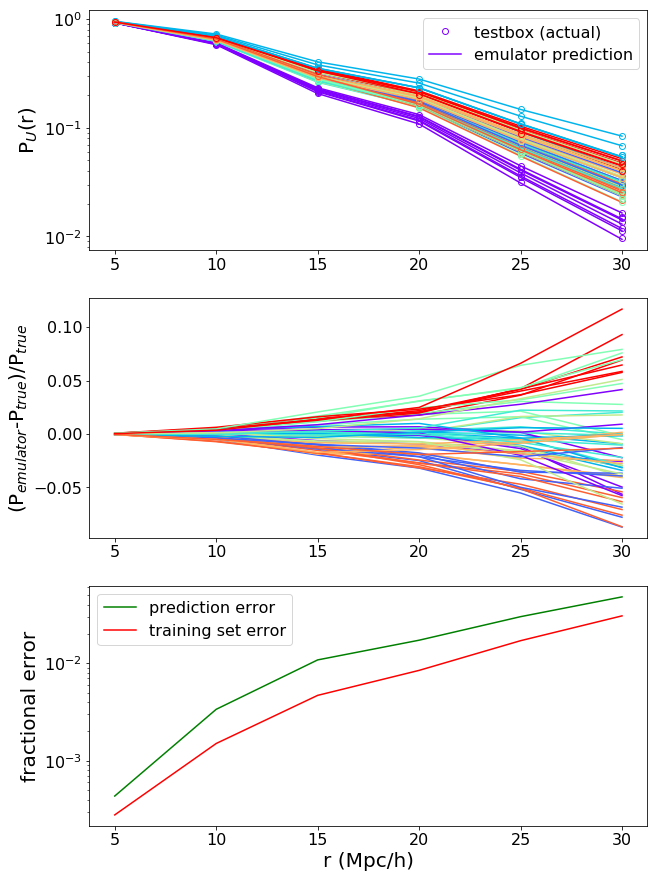

In [145]:
statistic='upf'
traintag = '_nonolap'
testtag = '_mean_test0'
errtag = '_10hod_test0'
tag = ''
gptag = traintag + errtag + tag
acctag = gptag + testtag
plot_accuracy(statistic, acctag, errtag=errtag, nbins=6, remove=[5], plot_wrt_mean=False)

(0.001, 1.5706914611418281)

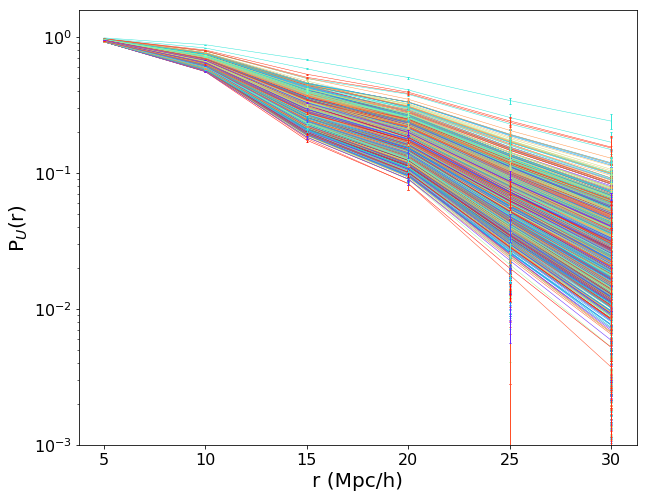

In [146]:
statistic='upf'
traintag = '_nonolap'
plot_training(statistic, traintag, errtag='_10hod_test0', nbins=6)
plt.ylim(10**-3)